In [1]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/')

from benji_girgs import utils, generation, points, fitting, mcmc
import glob
import pandas as pd
import networkit

import networkit as nk


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt

import do_feature_extract
import networkx as nx

import pickle


/cluster/scratch/bdayan/GIRG_data/socfb-Berkeley13.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-American75.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UConn.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-MSU24.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Brandeis99.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Virginia63.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Duke14.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Indiana69.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Simmons81.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Georgetown15.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UC64.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Bowdoin47.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UChicago30.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Middlebury45.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-MIT.SpaceOne
/cluster

In [26]:
n=4000
tau=2.5
alpha=1.5
desiredAvgDegree=50.0
d=2

In [27]:
g, edges, weights, pts, const = generation.generate_GIRG_nk(
        n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=points.PointsTorus2, c_implementation=True)

In [28]:
nk.overview(g)

Network Properties:
nodes, edges			4000, 99812
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.012480
clustering coefficient		0.450249
min/max/avg degree		7, 1603, 49.906000
degree assortativity		-0.090090
number of connected components	1
size of largest component	4000 (100.00 %)


In [29]:
foo = nk.distance.EffectiveDiameter(g, ratio=0.9).run()

In [30]:
foo.getEffectiveDiameter()

2.9425

In [31]:
g2, edges, weights, pts, const = generation.generate_GIRG_nk(
        n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree+10, points_type=points.PointsCube, c_implementation=True)

/cluster/home/bdayan/girgs/benji_src/benji_girgs/generation.py:626: RuntimeWarning: divide by zero encountered in divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
/cluster/home/bdayan/girgs/benji_src/benji_girgs/generation.py:627: RuntimeWarning: divide by zero encountered in divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


In [32]:
nk.overview(g2)

Network Properties:
nodes, edges			4000, 103107
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.012892
clustering coefficient		0.491554
min/max/avg degree		1, 2677, 51.553500
degree assortativity		-0.085049
number of connected components	1
size of largest component	4000 (100.00 %)


In [33]:
foo2 = nk.distance.EffectiveDiameter(g2, ratio=0.9).run()
foo2.getEffectiveDiameter()

2.7355

In [7]:
os.getcwd()

'/cluster/home/bdayan/girgs/benji_src'

In [11]:
os.environ['DATA_PATH'] = '../FE_FB_Torus_with_mixed/'

In [12]:
os.listdir(os.environ['DATA_PATH'])

['Icon\r', '2-features', '3-cleaned_features', '4-classification_results']

In [13]:
df_clean = pd.read_csv(os.environ['DATA_PATH'] + '3-cleaned_features/results.csv')
df_clean.Info = df_clean.Info.apply(lambda temp: {'Info': temp} if '|' not in temp else {key: eval(var) for key, var in [x.split('=') for x in temp.split('|')]})
df_real = df_clean.loc[df_clean.Model == 'real-world']
df_clean['alpha'] = df_clean.Info.apply(lambda x: float(x['alpha']) if 'alpha' in x else 1/float(x['t']) if 't' in x else None)
df_clean.shape

(3120, 274)

In [24]:
[x for x in df_clean.columns if 'lose' in x]

['Centrality.Closeness.Dispersion.Coefficient Of Variation',
 'Centrality.Closeness.Dispersion.Coefficient Of Variation (Rank)',
 'Centrality.Closeness.Dispersion.Standard Deviation',
 'Centrality.Closeness.Dispersion.Standard Deviation (Rank)',
 'Centrality.Closeness.Dispersion.Uncorrected Coefficient Of Variation',
 'Centrality.Closeness.Dispersion.Uncorrected Coefficient Of Variation (Rank)',
 'Centrality.Closeness.Dispersion.Uncorrected Standard Deviation',
 'Centrality.Closeness.Dispersion.Uncorrected Standard Deviation (Rank)',
 'Centrality.Closeness.Dispersion.Uncorrected Variance',
 'Centrality.Closeness.Dispersion.Uncorrected Variance (Rank)',
 'Centrality.Closeness.Dispersion.Variance',
 'Centrality.Closeness.Dispersion.Variance (Rank)',
 'Centrality.Closeness.Location.1st Quartile',
 'Centrality.Closeness.Location.3rd Quartile',
 'Centrality.Closeness.Location.Arithmetic Mean',
 'Centrality.Closeness.Location.Arithmetic Mean (Rank)',
 'Centrality.Closeness.Location.Cubic Mea

In [25]:
df_mini = df_clean.loc[df_clean.Model.isin(['1d-girg', '2d-girg', '3d-girg', '1d-cube-girg', '2d-cube-girg', '3d-cube-girg', 'real-world']), ['Graph', 'Model', 'Type', 'Nodes', 'Edges', 'alpha', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean', 'Centrality.Degree.Location.Arithmetic Mean', 'Effective Diameter',  'Centrality.Closeness.Location.Arithmetic Mean',]].sort_values(['Graph', 'Model']).copy()
df_mini = df_mini.rename(columns={'Centrality.ClusteringCoefficient.Location.Arithmetic Mean': 'LCC mean', 'Centrality.Degree.Location.Arithmetic Mean': 'degree mean', 'Effective Diameter': 'eff-diameter (90%)',  'Centrality.Closeness.Location.Arithmetic Mean': 'closeness mean'})

In [26]:
df_mini

,Graph,Model,Type,Nodes,Edges,alpha,LCC mean,degree mean,eff-diameter (90%),closeness mean
2651,socfb-American75,1d-cube-girg,socfb,6370,214397,1.270471,0.241528,67.314600,3.057928,0.000056
2646,socfb-American75,1d-girg,socfb,6370,217845,1.295678,0.240732,68.397174,3.001570,0.000055
2652,socfb-American75,2d-cube-girg,socfb,6370,214837,1.258233,0.241137,67.452747,3.156986,0.000055
2647,socfb-American75,2d-girg,socfb,6370,217717,1.356220,0.237531,68.356986,3.001099,0.000055
2653,socfb-American75,3d-cube-girg,socfb,6370,216481,1.270471,0.239050,67.968917,3.324333,0.000054
...,...,...,...,...,...,...,...,...,...,...
2712,socfb-Yale4,2d-cube-girg,socfb,8561,397818,1.252201,0.233316,92.937274,3.006074,0.000041
2707,socfb-Yale4,2d-girg,socfb,8561,405994,1.363297,0.236121,94.847331,2.999883,0.000042
2713,socfb-Yale4,3d-cube-girg,socfb,8561,402760,1.264322,0.236271,94.091812,3.030721,0.000041
2708,socfb-Yale4,3d-girg,socfb,8561,405823,1.504643,0.233731,94.807382,3.000000,0.000042


3.4315643803850072e-06

Text(0.5, 1.0, 'closeness std')

Text(0.5, 0, 'real-world')

Text(0, 0.5, '2d-girg')

Text(0.5, 1.0, 'closeness mean')

Text(0.5, 0, 'real-world')

Text(0, 0.5, '2d-girg')

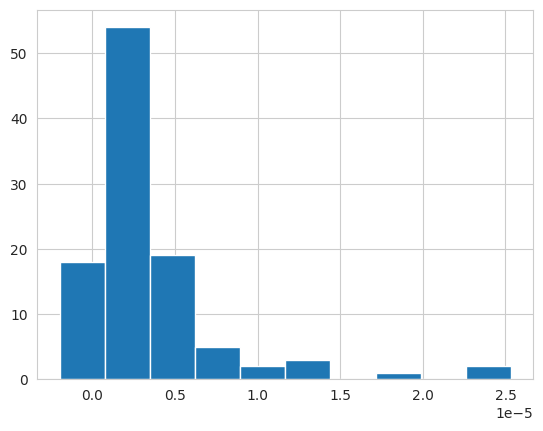

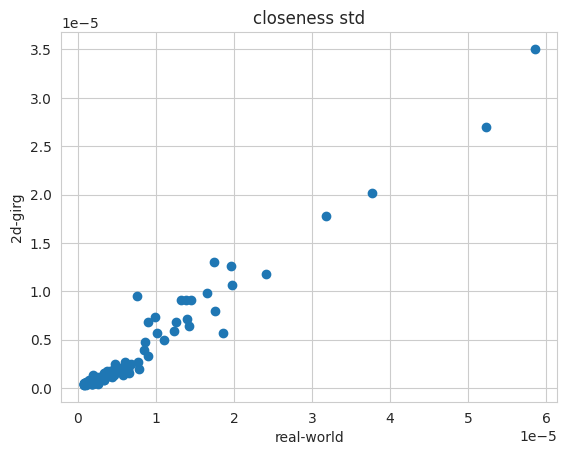

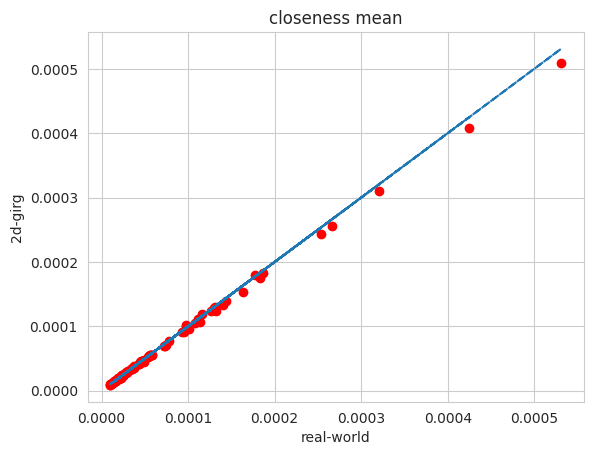

In [48]:
a = df_clean.loc[df_clean.Model == 'real-world'].sort_values('Graph').loc[:, 'Centrality.Closeness.Dispersion.Standard Deviation'].values
b = df_clean.loc[df_clean.Model == '2d-girg'].sort_values('Graph').loc[:, 'Centrality.Closeness.Dispersion.Standard Deviation'].values
np.mean(a-b)
_ = plt.hist(a-b)
fig = plt.figure()
# ax = fig.add_subplot(111)
_ = plt.scatter(a, b, label='closeness std')
plt.title('closeness std')
plt.xlabel('real-world')
plt.ylabel('2d-girg')

_ = plt.figure()
c = df_mini.loc[df_mini.Model == 'real-world'].sort_values('Graph').loc[:, 'closeness mean'].values
d = df_mini.loc[df_mini.Model == '2d-girg'].sort_values('Graph').loc[:, 'closeness mean'].values

e = df_mini.loc[df_mini.Model == 'real-world'].sort_values('Graph').loc[:, 'Nodes'].values
# ax2 = ax.twinx()
plt.scatter(c, d, color='r', label='closeness mean')
plt.title('closeness mean')
plt.xlabel('real-world')
plt.ylabel('2d-girg')
plt.plot(c, c, linestyle='--')

Text(0.5, 1.0, 'real world graphs closeness std against n')

Text(0.5, 0, 'number of nodes')

Text(0, 0.5, 'closeness std')

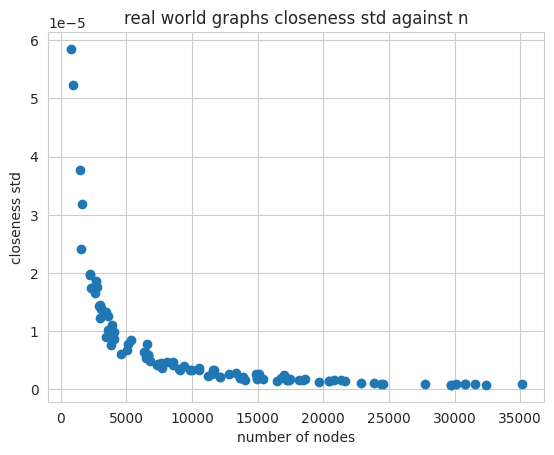

In [52]:
plt.scatter(e, a)
plt.title('real world graphs closeness std against n')
plt.xlabel('number of nodes')
plt.ylabel('closeness std')

1.8391474183581869e-06

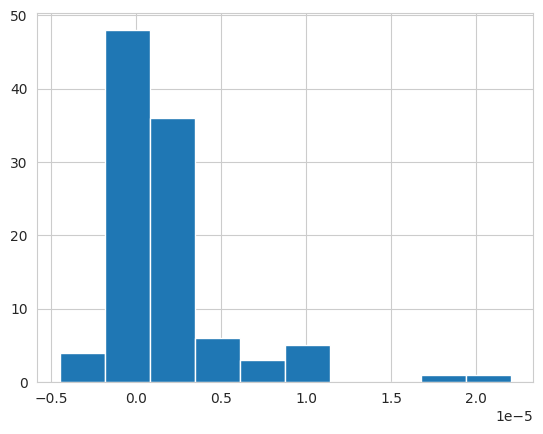

In [28]:
a = df_mini.loc[df_mini.Model == 'real-world'].sort_values('Graph').loc[:, 'closeness mean'].values
b = df_mini.loc[df_mini.Model == '2d-girg'].sort_values('Graph').loc[:, 'closeness mean'].values
np.mean(a-b)
_ = plt.hist(a-b)

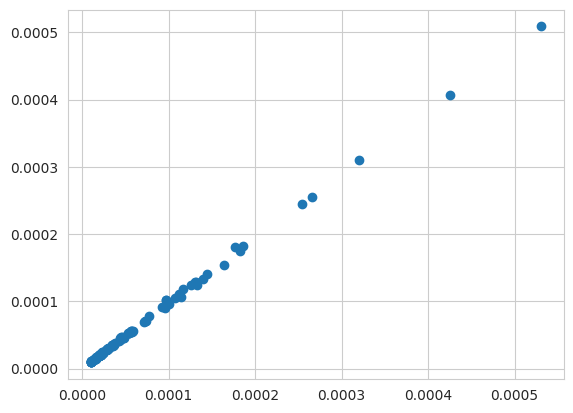

In [31]:
plt.scatter(a, b)

(array([75., 11., 10.,  3.,  2.,  0.,  1.,  1.,  0.,  1.]),
 array([9.04604906e-06, 5.90266466e-05, 1.09007244e-04, 1.58987842e-04,
        2.08968439e-04, 2.58949037e-04, 3.08929635e-04, 3.58910232e-04,
        4.08890830e-04, 4.58871427e-04, 5.08852025e-04]),
 <BarContainer object of 10 artists>)

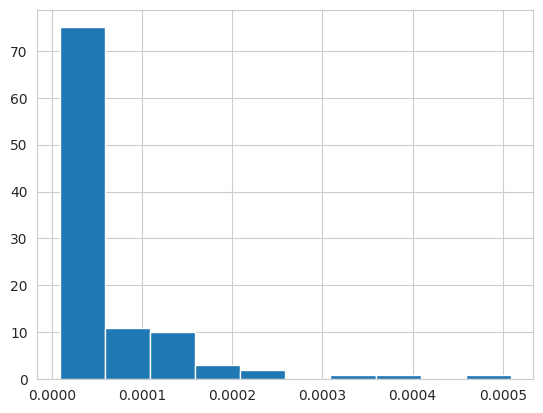

In [30]:
plt.hist(b)

0.17553842488541654

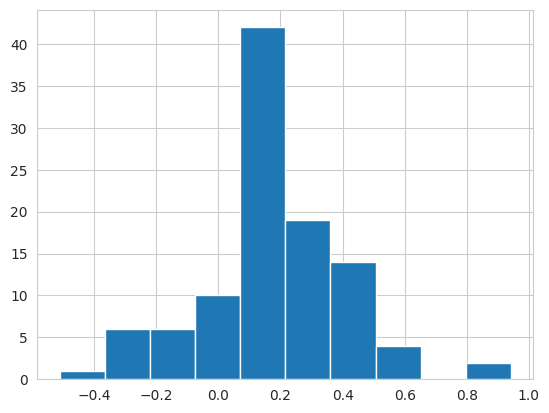

In [20]:
a = df_mini.loc[df_mini.Model == 'real-world'].sort_values('Graph').loc[:, 'eff-diameter (90%)'].values
b = df_mini.loc[df_mini.Model == '2d-girg'].sort_values('Graph').loc[:, 'eff-diameter (90%)'].values
np.mean(a-b)
_ = plt.hist(a-b)

(array([68.,  3.,  1.,  3.,  2.,  8.,  2.,  2.,  4., 11.]),
 array([2.97850259, 3.07982988, 3.18115716, 3.28248444, 3.38381172,
        3.48513901, 3.58646629, 3.68779357, 3.78912085, 3.89044814,
        3.99177542]),
 <BarContainer object of 10 artists>)

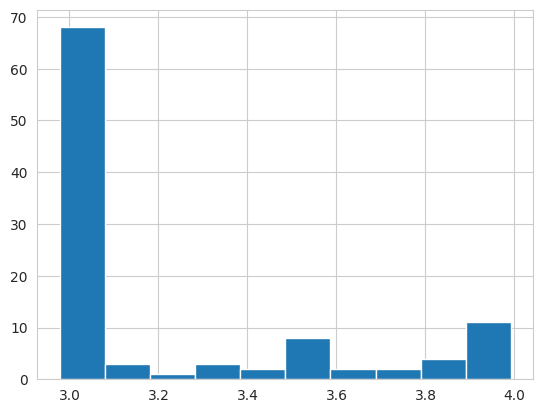

In [18]:
plt.hist(b)

(array([16., 30., 14., 18.,  6.,  7.,  3.,  3.,  3.,  4.]),
 array([2.98063128, 3.11609095, 3.25155063, 3.3870103 , 3.52246998,
        3.65792966, 3.79338933, 3.92884901, 4.06430869, 4.19976836,
        4.33522804]),
 <BarContainer object of 10 artists>)

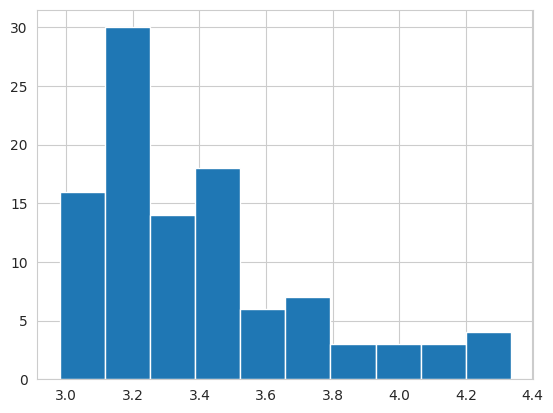

In [19]:
plt.hist(a)

In [23]:
np.max(a)

4.33522803713171

<module 'matplotlib.pyplot' from '/cluster/home/bdayan/girgs/venvtemp/lib64/python3.8/site-packages/matplotlib/pyplot.py'>

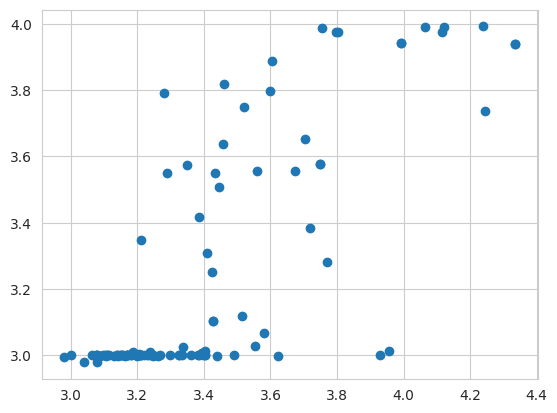

In [17]:
plt.scatter(a, b)
plt

0.041337756184868686

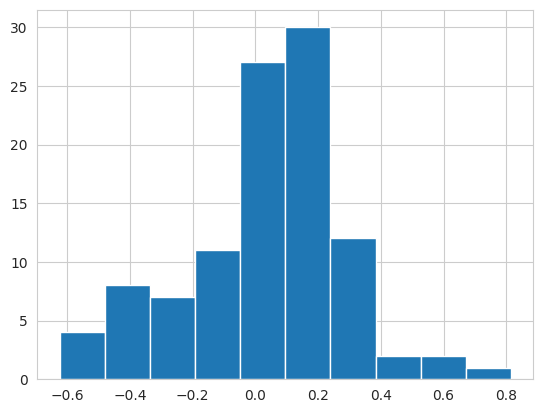

In [21]:
a = df_mini.loc[df_mini.Model == 'real-world'].sort_values('Graph').loc[:, 'eff-diameter (90%)'].values
b = df_mini.loc[df_mini.Model == '2d-cube-girg'].sort_values('Graph').loc[:, 'eff-diameter (90%)'].values
np.mean(a-b)
_ = plt.hist(a-b)

(array([44., 11.,  6.,  4.,  4.,  2.,  3.,  7.,  8., 15.]),
 array([2.98572664, 3.09089305, 3.19605945, 3.30122586, 3.40639226,
        3.51155866, 3.61672507, 3.72189147, 3.82705788, 3.93222428,
        4.03739069]),
 <BarContainer object of 10 artists>)

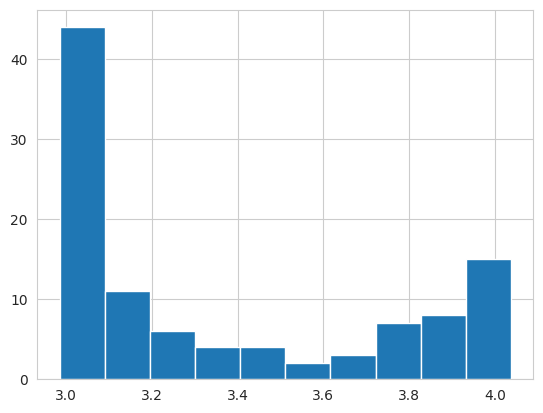

In [22]:
plt.hist(b)

In [65]:
np.mean(a-b)

0.17553842488541654

(array([16., 30., 14., 18.,  6.,  7.,  3.,  3.,  3.,  4.]),
 array([2.98063128, 3.11609095, 3.25155063, 3.3870103 , 3.52246998,
        3.65792966, 3.79338933, 3.92884901, 4.06430869, 4.19976836,
        4.33522804]),
 <BarContainer object of 10 artists>)

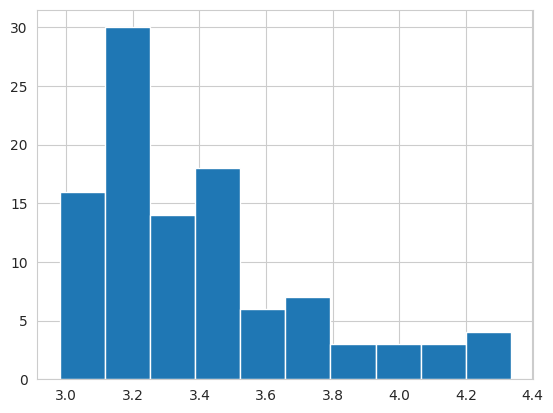

In [61]:
plt.hist(a)

In [68]:
a.max()

4.33522803713171

In [69]:
a.min()

2.980631276901004